<h1 style='color: green; font-size: 30px; font-weight: bold;'>Data Science - Regressão Linear: de baixo dos panos</h1>

# <font color='black' style='font-size: 24px;'>1.1 Conhecendo o Dataset</font>
<hr style='border: 2px solid black;'>

## Importando o numpy e pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
dados = pd.read_csv('Dados/dados_regressao_simples.csv')

In [3]:
valor = np.array(dados['Valor'])
area = np.array(dados['Area'])

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

Podemos então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \alpha x_i + \beta + \epsilon_i$$

Sendo $y_i$ é o valor de um determinado imóvel, $x_i$ é a área deste mesmo imóvel e o termo $\epsilon_i$ é o termo de erro (esperamos que pequeno) representando que existem fatores não levados em consideração para este modelo simples.

Supondo que temos $\alpha$ e $\beta$, podemos fazer uma previsão através facilmente.

In [4]:
def predict(alpha, beta, x_i):
    return alpha*x_i + beta

Como vamos escolher as constântes $\alpha$ e $\beta$?

Sabendo que podemos calcular a saída prevista com a função "predict" e sabendo qual é a saída real, é possível calcularmos o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [5]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que podemos ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, devemos somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

In [6]:
def sum_square_error(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x,y))

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Isto é um problema conhecido na algebra linear como quadrados mínimos e sua resolução dá as equações:

$$\alpha = \bar{y} = \beta\bar{x}$$

$$\beta = correlacao(x, y) \times \frac{\sigma(y)}{\sigma(x)}$$

Sendo $\bar{x}$ e $\bar{y}$ as médias dos valores de x e y, correlação(x, y) é a correlação entre os valores de x e y, e $\sigma(x)$, $\sigma(y)$ os desvios padrões de x e y.

Assim, vamos definir uma função para minimizar os valores de $\alpha$ e $\beta$. 

In [7]:
def least_squares(x, y):
    beta = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    alpha = y.mean() - beta * x.mean()
    return alpha, beta

Agora sim, podemos escolher valores para $\alpha$ e $\beta$ e fazer nossa regressão!

In [8]:
alpha, beta = least_squares(area, valor)

Para avaliar se nossa regressão está de fato representando o que queremos, vamos verificar na função de erro:

In [9]:
sum_square_error(alpha, beta, area, valor)

1.969160403424535e+19

In [10]:
## Plotar um gráfico mostrando a função e o conjunto de dados

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

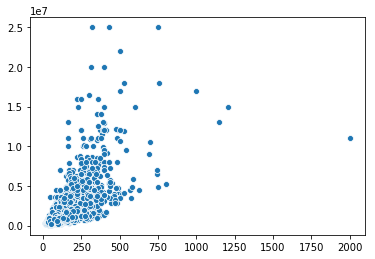

In [18]:
#plt.plot(area,valor)
sns.scatterplot(x=area, y=valor)